<a href="https://colab.research.google.com/github/douglaspedroni/estudo_python/blob/main/estudo_venda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
from matplotlib import pyplot as plt

In [4]:

from google.colab import files

In [67]:
#upload de arquivo

carregados = files.upload()

#Exibir resultados

for fn in carregados.keys():
  name = fn
  tamanho = len(carregados[fn])

  print(f'\nArquivo carregado: {name}\nTamanho: {tamanho} bytes')

Saving cadastro.xlsx to cadastro.xlsx

Arquivo carregado: cadastro.xlsx
Tamanho: 9406 bytes


In [68]:
cadastro = pd.read_excel('cadastro.xlsx')
venda = pd.read_excel('venda.xlsx')
fornecedor = pd.read_excel('fornecedor.xlsx')

print(cadastro)
print(fornecedor)
print(venda)

   id_vendedor       nome dt_nascimento  uf
0            1  Cristiane    1995-01-05  SP
1            2       Joao    2000-04-23  PE
2            3      Maria    2002-01-30  PR
3            4      Pedro    2001-09-11  MG
4            5      Julia    1996-12-25  SP
5            6     Carlos    1985-03-12  PR
6            7      Joana    1950-10-10  MG
7            8     Wagner    1983-11-05  PE
8            9    Eduardo    1984-06-07  SP
9           10     Gisele    2001-02-28  SP


In [92]:
# Remover linhas com valores ausentes
cadastro = cadastro.dropna()
fornecedor = fornecedor.dropna()

# Remover duplicatas
cadastro = cadastro.drop_duplicates()
fornecedor = fornecedor.drop_duplicates()

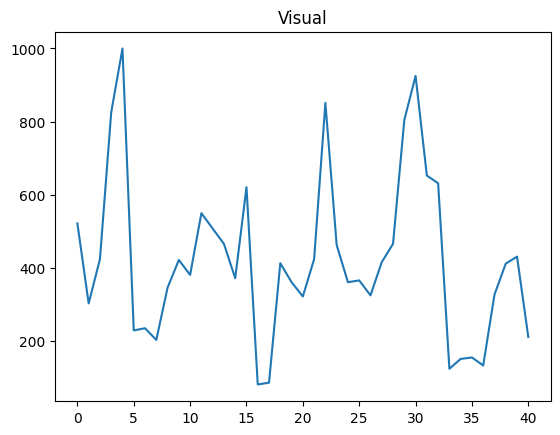

In [7]:
venda = venda.fillna(0)

plt.plot(venda['valor_venda'])

plt.title('Visual')

plt.savefig('grafico_colab.png', dpi=400)

In [50]:

files.download('grafico_colab.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
resultvenda = sum(venda['valor_venda'])

print(resultvenda)

17264


In [16]:

qtdvenda = venda['id_venda'].count()

print(qtdvenda)

41


In [60]:
# Filtra as vendas do fornecedor específico
id_fornecedor_x = 5  # Substitua pelo nome do fornecedor que você deseja



# Filtra o DataFrame para encontrar o fornecedor correspondente ao id_fo
fornecedor_resultado = fornecedor[fornecedor['id_fornecedor'] == id_fornecedor_x]
vendas_fornecedor_x = venda[venda['id_fornecedor'] == id_fornecedor_x]

#print(vendas_fornecedor_x)


#-------------

# Obtém o nome do fornecedor, se existir
if not fornecedor_resultado.empty:
    nome_fornecedor = fornecedor_resultado['fornecedor'].values[0]
    #print(f"Fornecedor: {nome_fornecedor}")
#else:
    #print("Fornecedor não encontrado.")


# Conta o número de id_venda
contagem_vendas = vendas_fornecedor_x['id_venda'].count()

print(f"Número de vendas do fornecedor {nome_fornecedor}: {contagem_vendas}")

#quantidade de produtos
quantidade_produto = vendas_fornecedor_x['quantidade_produto'].sum()

print(f"Quantidade de produtos do fornecedor {nome_fornecedor}: {quantidade_produto}")

#valor total de vendas
valor_vendas = vendas_fornecedor_x['valor_venda'].sum()

print(f"Valor em vendas do fornecedor {nome_fornecedor}: {valor_vendas}")


Número de vendas do fornecedor cobasi: 11
Quantidade de produtos do fornecedor cobasi: 19
Valor em vendas do fornecedor cobasi: 4261


In [69]:
## Analise dos dados

# Exibir os dados carregados
print("Dados de Vendas:")
print(venda)

print("\nDados de Vendedores:")
print(cadastro)

print("\nDados de Fornecedores:")
print(fornecedor)


Dados de Vendas:
    id_venda  id_vendedor  valor_venda data_venda  quantidade_produto  \
0          1            7          521 2024-01-01                   2   
1          2            7          302 2024-01-01                   3   
2          3            1          423 2024-01-01                   1   
3          4            2          825 2024-01-01                   1   
4          5            4         1000 2024-01-01                   1   
5          6            4          228 2024-01-01                   1   
6          7            5          234 2024-02-02                   1   
7          8            6          202 2024-02-03                   2   
8          9            8          345 2024-02-04                   3   
9         10            5          421 2024-02-05                   2   
10        11            9          380 2024-03-05                   1   
11        12           10          549 2024-03-06                   2   
12        13           10         

In [71]:
# Manipulação dos dados: juntando as tabelas
# Juntar vendas com vendedores e fornecedores
dados_completos = venda.merge(cadastro, on='id_vendedor')\
                          .merge(fornecedor, on='id_fornecedor')


In [72]:
# Exibir os dados combinados
print("\nDados Completos:")
print(dados_completos)


Dados Completos:
    id_venda  id_vendedor  valor_venda data_venda  quantidade_produto  \
0          1            7          521 2024-01-01                   2   
1          2            7          302 2024-01-01                   3   
2          3            1          423 2024-01-01                   1   
3          4            2          825 2024-01-01                   1   
4          5            4         1000 2024-01-01                   1   
5          6            4          228 2024-01-01                   1   
6          7            5          234 2024-02-02                   1   
7          8            6          202 2024-02-03                   2   
8          9            8          345 2024-02-04                   3   
9         10            5          421 2024-02-05                   2   
10        11            9          380 2024-03-05                   1   
11        12           10          549 2024-03-06                   2   
12        13           10        

In [81]:
# Análise: Total de vendas por vendedor
total_vendas_por_vendedor = dados_completos.groupby(['id_vendedor', 'nome'])['valor_venda'].sum().reset_index()

# Ordenar do maior para o menor
total_vendas_por_vendedor = total_vendas_por_vendedor.sort_values(by='valor_venda', ascending=False)

# Exibir o resultado da análise
print("\nTotal de Vendas por Vendedor:")
print(total_vendas_por_vendedor)


Total de Vendas por Vendedor:
   id_vendedor       nome  valor_venda
3            4      Pedro         3656
9           10     Gisele         2254
4            5      Julia         2166
2            3      Maria         2033
7            8     Wagner         2029
6            7      Joana         1727
1            2       Joao         1278
0            1  Cristiane         1109
8            9    Eduardo          810
5            6     Carlos          202


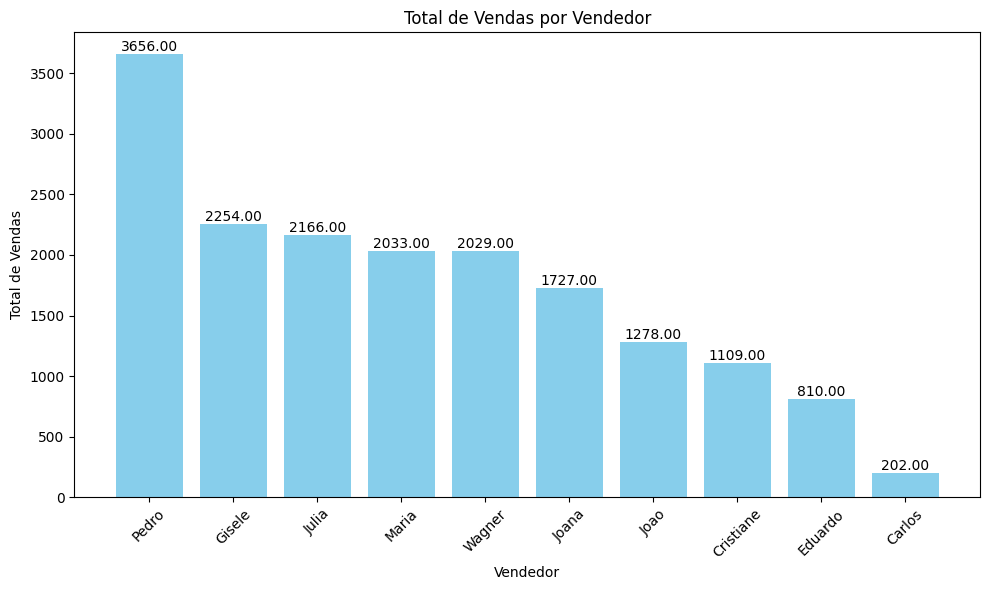

In [84]:
# Criar gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(total_vendas_por_vendedor['nome'], total_vendas_por_vendedor['valor_venda'], color='skyblue')
plt.xlabel('Vendedor')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Vendedor')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta o layout para evitar sobreposição

# Adicionar rótulos de valor sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom')

# Exibir o gráfico
plt.show()

In [85]:
# Análise: Total de vendas por vendedor
total_vendas_por_uf = dados_completos.groupby(['uf'])['valor_venda'].sum().reset_index()

# Ordenar do maior para o menor
total_vendas_por_uf = total_vendas_por_uf.sort_values(by='valor_venda', ascending=False)

# Exibir o resultado da análise
print("\nTotal de Vendas por UF:")
print(total_vendas_por_uf)


Total de Vendas por UF:
   uf  valor_venda
3  SP         6339
0  MG         5383
1  PE         3307
2  PR         2235


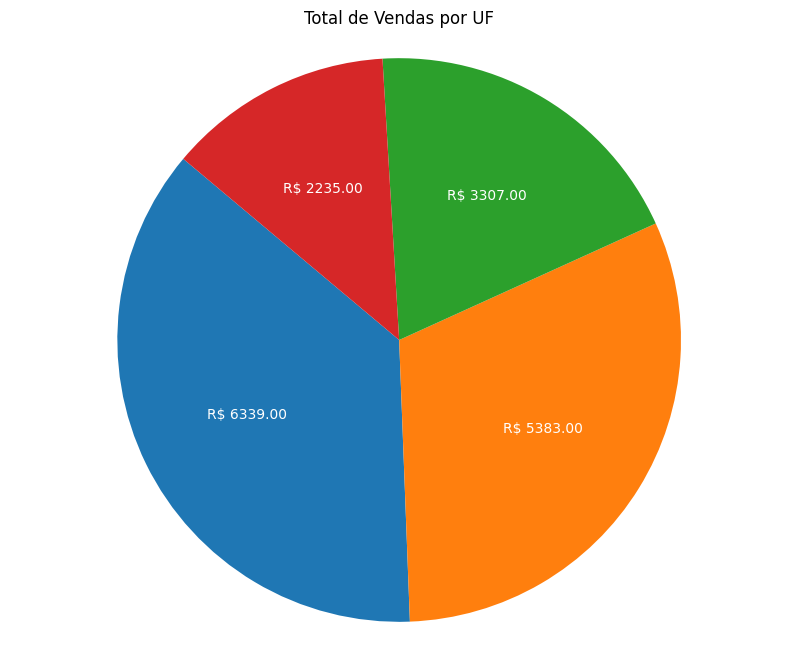

In [91]:
# Criar gráfico de pizza
plt.figure(figsize=(8, 8))

# Criar o gráfico de pizza com rótulos e porcentagens
plt.pie(
    total_vendas_por_uf['valor_venda'],
    labels=[f'{uf} - R$ {valor:.2f}' for uf, valor in zip(total_vendas_por_uf['uf'], total_vendas_por_uf['valor_venda'])],
    autopct=lambda p: f'R$ {p * total_vendas_por_uf["valor_venda"].sum() / 100:.2f}' if p > 0 else '',  # Rótulo com valor
    startangle=140,
    textprops=dict(color="w")  # Cor do text
)

# Adicionar título
plt.title('Total de Vendas por UF')

# Exibir o gráfico
plt.axis('equal')  # Igualar os eixos para que o gráfico fique circular
plt.show()

In [94]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=998c26abfcaef1db191ecdc91f7e30b39768778a5c695540d8b09b8e8ff37d01
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [97]:
from pyspark.sql import SparkSession

# Inicializando Spark
spark = SparkSession.builder.appName('Exemplo').getOrCreate()

# Carregar dados
df = spark.read.csv('venda.xlsx', header=True, inferSchema=True)

# Mostrar o DataFrame
df.show()

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------